# Gather the Data

In [1]:
import pandas as pd

COVID_df = pd.read_csv('Data/US_Data.csv').drop(columns='Unnamed: 0')
COVID_df.head()

,State,Country,Last Update,Confirmed,Deaths,Recovered,Record Date,Latitude,Longitude,County,Active,Combined_Key,Incident Rate,Case-Fatality Ratio
0,Washington,US,1/22/2020 17:00,1.0,NaN,NaN,01-22-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Washington,US,1/23/20 17:00,1.0,NaN,NaN,01-23-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Washington,US,1/24/20 17:00,1.0,NaN,NaN,01-24-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chicago,US,1/24/20 17:00,1.0,NaN,NaN,01-24-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Washington,US,1/25/20 17:00,1.0,NaN,NaN,01-25-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# County-specific
COVID_df.groupby(['State', 'County', 'Record Date']).max().head(3)

Country          Last Update  Confirmed  Deaths  \
State   County  Record Date                                                   
Alabama Autauga 03-22-2020       US        3/22/20 23:45        0.0     0.0   
                03-23-2020       US  2020-03-23 23:19:34        0.0     0.0   
                03-24-2020       US  2020-03-24 23:37:31        1.0     0.0   

                             Recovered   Latitude  Longitude  Active  \
State   County  Record Date                                            
Alabama Autauga 03-22-2020         0.0  32.539527 -86.644082     0.0   
                03-23-2020         0.0  32.539527 -86.644082     0.0   
                03-24-2020         0.0  32.539527 -86.644082     0.0   

                                     Combined_Key  Incident Rate  \
State   County  Record Date                                        
Alabama Autauga 03-22-2020   Autauga, Alabama, US            NaN   
                03-23-2020   Autauga, Alabama, US            NaN   
                03-24-2020   Autauga, Alabama, US            NaN   

                             Case-Fatality Ratio  
State   County  Record Date                       
Alabama Autauga 03-22-2020                   NaN  
                03-23-2020                   NaN  
                03-24-2020                   NaN

### Minnesota-Specific Graphs

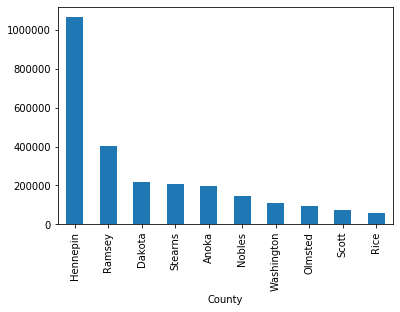

In [3]:
# Sum of all confirmed cases (10 highest case count)
counties_gb = COVID_df.groupby(['State', 'County'])
counties_gb.sum().loc['Minnesota']['Confirmed'].sort_values(ascending=False)[:10].plot.bar()

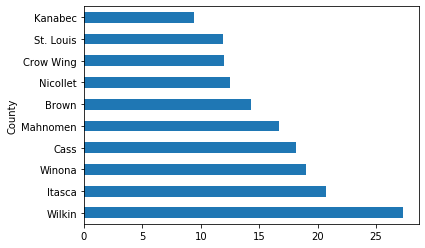

In [4]:
# Case-Fatality Ratio peaks (dropped the first-place 'Unassigned' which has no specific county)
counties_gb.max().loc['Minnesota']['Case-Fatality Ratio'].sort_values(ascending=False)[1:11].plot.barh()

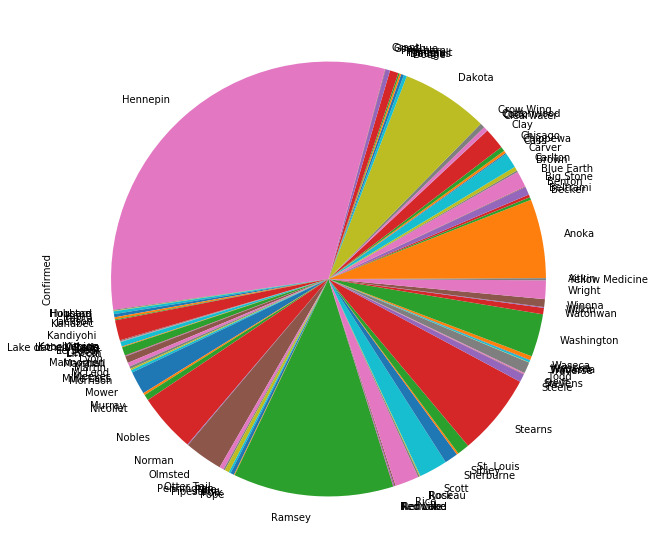

In [17]:
# Division of Confirmed Cases
counties_gb.sum().loc['Minnesota'].loc[counties_gb.max().loc['Minnesota'].index != 'Unassigned'].plot.pie(y='Confirmed', figsize=(10,10), legend=False)

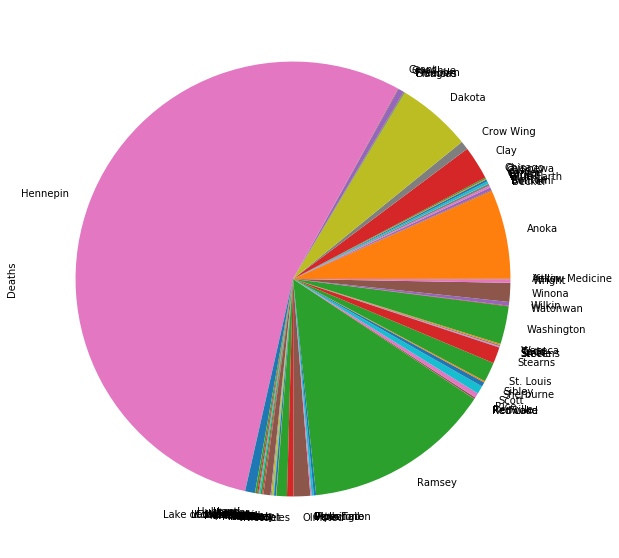

In [18]:
# Division of Deaths
counties_gb.sum().loc['Minnesota'].loc[counties_gb.max().loc['Minnesota'].index != 'Unassigned'].plot.pie(y='Deaths', figsize=(10,10), legend=False)

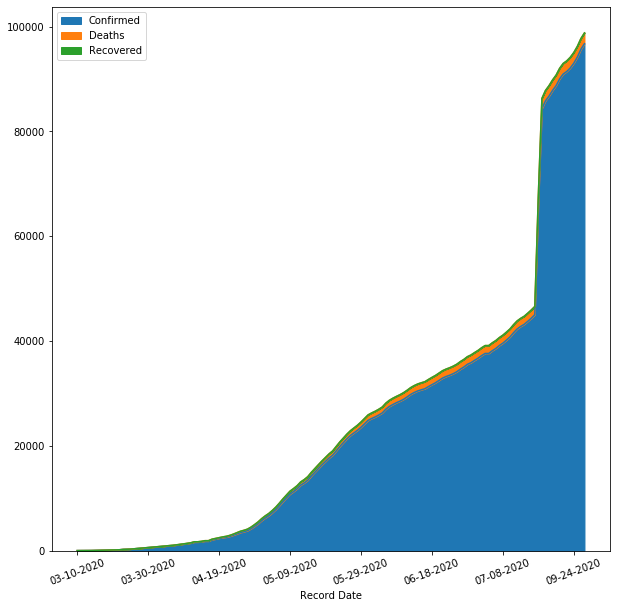

In [46]:
# Historic Minnesota Case History
COVID_df.loc[COVID_df['State'] == 'Minnesota'].groupby(['Record Date']).sum().drop(
    columns={'Latitude', 'Longitude', 'Active', 'Incident Rate', 'Case-Fatality Ratio'}
).plot.area(rot=20, figsize=(10,10))